# *Olympic Medals 1896-2024*

Joseph Lardie

August 2024

# *Imports*

In [1]:
# Data manipulation and numerical operations
import numpy as np
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

# Geographical data conversion
import pycountry_convert as pc
import country_converter as coco

# Statistical analysis
import scipy.stats as stats
from scipy.stats import f_oneway

# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# *Loading Data*

In [2]:
# Loading Medal Data for 2024
Medals = pd.read_csv('medals_total.csv')

In [3]:
# Loading Medal Data for 1896-2020
smd =  pd.read_csv('Summer_olympic_Medals.csv')

# *Data Exploration*

In [4]:
# Preview of Medals Data for 2024
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   country_long  92 non-null     object
 3   Gold Medal    92 non-null     int64 
 4   Silver Medal  92 non-null     int64 
 5   Bronze Medal  92 non-null     int64 
 6   Total         92 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 5.2+ KB


In [5]:
# Inspecting Medals from 2024
Medals.head()

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91
2,JPN,Japan,Japan,20,12,13,45
3,AUS,Australia,Australia,18,19,16,53
4,FRA,France,France,16,26,22,64


In [6]:
# Preview of Medals Data for 1896-2020
smd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1344 non-null   int64 
 1   Host_country  1344 non-null   object
 2   Host_city     1344 non-null   object
 3   Country_Name  1344 non-null   object
 4   Country_Code  1258 non-null   object
 5   Gold          1344 non-null   int64 
 6   Silver        1344 non-null   int64 
 7   Bronze        1344 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 84.1+ KB


In [7]:
# Inspecting data from 1896-2020
smd.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1896,Greece,Athens,Great Britain,GBR,2,3,2
1,1896,Greece,Athens,Hungary,HUN,2,1,3
2,1896,Greece,Athens,France,FRA,5,4,2
3,1896,Greece,Athens,United States,USA,11,7,2
4,1896,Greece,Athens,Germany,GER,6,5,2


# *Data Cleaning*

In [8]:
#Dropping unnecessary collumns
columns_to_drop = ["country_long"]
Medals = Medals.drop(columns_to_drop, axis = 1)
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   Gold Medal    92 non-null     int64 
 3   Silver Medal  92 non-null     int64 
 4   Bronze Medal  92 non-null     int64 
 5   Total         92 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.4+ KB


In [9]:
# Adding in columns missing from 2024 medal totals data Taht are already in the other data set
Medals['Year'] = 2024
Medals['Host_country'] = "France"
Medals['Host_city'] = "Paris" 

In [10]:
# Confiming new columns were added
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   Gold Medal    92 non-null     int64 
 3   Silver Medal  92 non-null     int64 
 4   Bronze Medal  92 non-null     int64 
 5   Total         92 non-null     int64 
 6   Year          92 non-null     int64 
 7   Host_country  92 non-null     object
 8   Host_city     92 non-null     object
dtypes: int64(5), object(4)
memory usage: 6.6+ KB


In [11]:
# Check for missing values
print("There are", Medals.isna().sum().sum(), "missing values total.")

There are 0 missing values total.


In [12]:
# Confiming data was added to the dataframe
Medals.head()

,country_code,country,Gold Medal,Silver Medal,Bronze Medal,Total,Year,Host_country,Host_city
0,USA,United States,40,44,42,126,2024,France,Paris
1,CHN,China,40,27,24,91,2024,France,Paris
2,JPN,Japan,20,12,13,45,2024,France,Paris
3,AUS,Australia,18,19,16,53,2024,France,Paris
4,FRA,France,16,26,22,64,2024,France,Paris


In [13]:
# Renaming columns to match the other data set
Medals.rename(columns={
    'country_code': 'Country_Code',
    'country': 'Country_Name',
    'Gold Medal': 'Gold',
    'Silver Medal': 'Silver',
    'Bronze Medal': 'Bronze',
    'Total': 'Total_Medals'
}, inplace=True)

In [14]:
# Confirming column names were changed
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country_Code  92 non-null     object
 1   Country_Name  92 non-null     object
 2   Gold          92 non-null     int64 
 3   Silver        92 non-null     int64 
 4   Bronze        92 non-null     int64 
 5   Total_Medals  92 non-null     int64 
 6   Year          92 non-null     int64 
 7   Host_country  92 non-null     object
 8   Host_city     92 non-null     object
dtypes: int64(5), object(4)
memory usage: 6.6+ KB


In [15]:
# Confirming column names are matching other dataset
smd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1344 non-null   int64 
 1   Host_country  1344 non-null   object
 2   Host_city     1344 non-null   object
 3   Country_Name  1344 non-null   object
 4   Country_Code  1258 non-null   object
 5   Gold          1344 non-null   int64 
 6   Silver        1344 non-null   int64 
 7   Bronze        1344 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 84.1+ KB


In [16]:
# Adding a Total_Medals column to the smd data
smd['Total_Medals'] = smd['Gold'] + smd['Silver'] + smd['Bronze']

In [17]:
# Confiming column was added
smd.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals
0,1896,Greece,Athens,Great Britain,GBR,2,3,2,7
1,1896,Greece,Athens,Hungary,HUN,2,1,3,6
2,1896,Greece,Athens,France,FRA,5,4,2,11
3,1896,Greece,Athens,United States,USA,11,7,2,20
4,1896,Greece,Athens,Germany,GER,6,5,2,13


# *Merging Data Frames Together*

In [18]:
# concatenating the two datasets together
df = pd.concat([smd, Medals], ignore_index=True)

In [19]:
# Checking that the dataframes merged properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1436 non-null   int64 
 1   Host_country  1436 non-null   object
 2   Host_city     1436 non-null   object
 3   Country_Name  1436 non-null   object
 4   Country_Code  1350 non-null   object
 5   Gold          1436 non-null   int64 
 6   Silver        1436 non-null   int64 
 7   Bronze        1436 non-null   int64 
 8   Total_Medals  1436 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 101.1+ KB


In [20]:
# Check for missing values
print("There are", df.isna().sum().sum(), "missing values total.")

There are 86 missing values total.


In [21]:
#Looking at location missing values
df.isna().sum()

Year             0
Host_country     0
Host_city        0
Country_Name     0
Country_Code    86
Gold             0
Silver           0
Bronze           0
Total_Medals     0
dtype: int64

## *Function to replace missing values*

In [22]:
# Create a mapping from Country_Name to Country_Code using rows with non-missing Country_Code
country_code_map = df.dropna(subset=['Country_Code'])[['Country_Name', 'Country_Code']].drop_duplicates()
country_code_map = country_code_map.set_index('Country_Name')['Country_Code'].to_dict()

# Function to fill missing Country_Code using the Country_Name
def fill_country_code(row):
    if pd.isna(row['Country_Code']):
        return country_code_map.get(row['Country_Name'], None)
    return row['Country_Code']

# Apply the function to fill missing Country_Code values
df['Country_Code'] = df.apply(fill_country_code, axis=1)

# Check if there are any remaining missing values
missing_codes = df[df['Country_Code'].isna()]
print(missing_codes)

      Year Host_country       Host_city                  Country_Name  \
1233  2016       Brazil  Rio de Janeiro  Independent Olympic Athletes   

     Country_Code  Gold  Silver  Bronze  Total_Medals  
1233         None     1       0       1             2  


## *Creating a function to fill in missing abbreviation*

In [23]:
# Create a mapping from Country_Name to Country_Code using rows with non-missing Country_Code and adding 'IOA' for Idependent Olympic Athletes.
def fill_country_code(row):
    if pd.isna(row['Country_Code']):
        if row['Country_Name'].lower() == 'independent olympic athletes':
            return 'IOA'  # Or some other code/leave it as None
        return country_code_map.get(row['Country_Name'].lower(), None)
    return row['Country_Code']
df['Country_Code'] = df.apply(fill_country_code, axis=1)
# Check if there are any remaining missing values
missing_codes = df[df['Country_Code'].isna()]
print(missing_codes)

Empty DataFrame
Columns: [Year, Host_country, Host_city, Country_Name, Country_Code, Gold, Silver, Bronze, Total_Medals]
Index: []


In [24]:
#Looking at missing values for each column
df.isna().sum()

Year            0
Host_country    0
Host_city       0
Country_Name    0
Country_Code    0
Gold            0
Silver          0
Bronze          0
Total_Medals    0
dtype: int64

In [25]:
# Inpsecting data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          1436 non-null   int64 
 1   Host_country  1436 non-null   object
 2   Host_city     1436 non-null   object
 3   Country_Name  1436 non-null   object
 4   Country_Code  1436 non-null   object
 5   Gold          1436 non-null   int64 
 6   Silver        1436 non-null   int64 
 7   Bronze        1436 non-null   int64 
 8   Total_Medals  1436 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 101.1+ KB


In [26]:
# Checking data is merged properly and accurate
df.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals
0,1896,Greece,Athens,Great Britain,GBR,2,3,2,7
1,1896,Greece,Athens,Hungary,HUN,2,1,3,6
2,1896,Greece,Athens,France,FRA,5,4,2,11
3,1896,Greece,Athens,United States,USA,11,7,2,20
4,1896,Greece,Athens,Germany,GER,6,5,2,13


In [27]:
# Checking data is merged properly and accurate
print(df)

      Year Host_country Host_city   Country_Name Country_Code  Gold  Silver  \
0     1896       Greece    Athens  Great Britain          GBR     2       3   
1     1896       Greece    Athens        Hungary          HUN     2       1   
2     1896       Greece    Athens         France          FRA     5       4   
3     1896       Greece    Athens  United States          USA    11       7   
4     1896       Greece    Athens        Germany          GER     6       5   
...    ...          ...       ...            ...          ...   ...     ...   
1431  2024       France     Paris           Peru          PER     0       0   
1432  2024       France     Paris          Qatar          QAT     0       0   
1433  2024       France     Paris      Singapore          SGP     0       0   
1434  2024       France     Paris       Slovakia          SVK     0       0   
1435  2024       France     Paris         Zambia          ZAM     0       0   

      Bronze  Total_Medals  
0          2          

In [28]:
# Checking Unique values
unique_counts = df.nunique()
print(unique_counts)

Year             30
Host_country     21
Host_city        23
Country_Name    171
Country_Code    163
Gold             51
Silver           44
Bronze           43
Total_Medals     96
dtype: int64


# *Feature Engineering*

## *Medal Efficiency*

In [29]:
# Medal Efficiency: Total Medals / Number of Years
df['Medal_Efficiency'] = df['Total_Medals'] / (df['Year'] - df.groupby('Country_Name')['Year'].transform('min') + 1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              1436 non-null   int64  
 1   Host_country      1436 non-null   object 
 2   Host_city         1436 non-null   object 
 3   Country_Name      1436 non-null   object 
 4   Country_Code      1436 non-null   object 
 5   Gold              1436 non-null   int64  
 6   Silver            1436 non-null   int64  
 7   Bronze            1436 non-null   int64  
 8   Total_Medals      1436 non-null   int64  
 9   Medal_Efficiency  1436 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 112.3+ KB


## *Host Advantage*

In [31]:
# Host Advantage: Binary feature indicating whether the country was the host in that year
df['Host_Advantage'] = df.apply(lambda x: 1 if x['Host_country'] == x['Country_Name'] else 0, axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              1436 non-null   int64  
 1   Host_country      1436 non-null   object 
 2   Host_city         1436 non-null   object 
 3   Country_Name      1436 non-null   object 
 4   Country_Code      1436 non-null   object 
 5   Gold              1436 non-null   int64  
 6   Silver            1436 non-null   int64  
 7   Bronze            1436 non-null   int64  
 8   Total_Medals      1436 non-null   int64  
 9   Medal_Efficiency  1436 non-null   float64
 10  Host_Advantage    1436 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 123.5+ KB


## *Continent Aggregation FIX*

In [33]:
# Get unique values in the 'Country_Code' column
unique_country_codes = df['Country_Code'].unique()

# Print the unique country codes
print(unique_country_codes)

['GBR' 'HUN' 'FRA' 'USA' 'GER' 'AUT' 'ZZX' 'GRE' 'SUI' 'AUS' 'DEN' 'ITA'
 'CUB' 'IND' 'NED' 'BOH' 'BEL' 'SWE' 'ESP' 'CAN' 'LUX' 'NOR' 'ANZ' 'RU1'
 'RSA' 'FIN' 'BRA' 'TCH' 'NZL' 'JPN' 'EST' 'HAI' 'ROU' 'POL' 'POR' 'ARG'
 'YUG' 'URU' 'PHI' 'CHI' 'EGY' 'IRL' 'LAT' 'MEX' 'TUR' 'JAM' 'PER' 'KOR'
 'TRI' 'PAN' 'PUR' 'IRI' 'CEY' 'URS' 'VEN' 'BUL' 'LIB' 'BAH' 'PAK' 'ISL'
 'EUA' 'ETH' 'SIN' 'ROC' 'MAR' 'BWI' 'IRQ' 'GHA' 'KEN' 'NGR' 'TUN' 'GDR'
 'FRG' 'UGA' 'CMR' 'MGL' 'PRK' 'NIG' 'COL' 'THA' 'BER' 'TAN' 'ZIM' 'GUY'
 'ZAM' 'DOM' 'CHN' 'SYR' 'CIV' 'TPE' 'ALG' 'ISV' 'AHO' 'SEN' 'DJI' 'SUR'
 'CRC' 'INA' 'EUN' 'SLO' 'QAT' 'MAS' 'LTU' 'IOP' 'CRO' 'ISR' 'NAM' 'KAZ'
 'BLR' 'UKR' 'RUS' 'CZE' 'TGA' 'GEO' 'AZE' 'MOZ' 'UZB' 'BDI' 'ARM' 'SVK'
 'MDA' 'HKG' 'ECU' 'KSA' 'BAR' 'SRI' 'VIE' 'KUW' 'KGZ' 'MKD' 'SCG' 'UAE'
 'PAR' 'ERI' 'SAM' 'SRB' 'TJK' 'MRI' 'TOG' 'SUD' 'AFG' 'TTO' 'GUA' 'GAB'
 'MNE' 'CYP' 'BOT' 'GRN' 'BRN' 'IOA' 'JOR' 'FIJ' 'KOS' 'SGP' 'SMR' 'TKM'
 'BUR' 'AIN' 'LCA' 'DMA' 'ALB' 'CPV' 'EOR']


In [34]:
# Extended manual mapping for country codes to continents
#fallback_mapping = {
#    'USA': 'North America',
#    'CAN': 'North America',
#    'GBR': 'Europe',
#    'EUN': 'Europe',  # Example: Unified Team
#    'ZAM': 'Africa',  # Example: Zambia (ZAM to ZM)
    # Add more mappings as needed for your dataset
#}

#def get_continent(Country_Code):
#    try:
        # Ensure the country_code is a string and has exactly 3 characters
#        if isinstance(Country_Code, str) and len(Country_Code) == 3:
            # Convert country code to alpha-2 format
#            alpha_2 = pc.country_alpha3_to_country_alpha2(Country_Code)
            
            # Get the continent code (e.g., NA, SA, AS, OC, AF, EU)
#            continent_code = pc.country_alpha2_to_continent_code(alpha_2)
            
            # Convert the continent code to the full name
#            continent_name = pc.convert_continent_code_to_continent_name(continent_code)
            
#            return continent_name
#        else:
#            return 'Unknown'  # Use 'Unknown' instead of None
#    except (KeyError, TypeError):
        # Fallback to manual mapping
#        return fallback_mapping.get(Country_Code, 'Unknown')

# Apply the function to your dataframe
#df['continent'] = df['Country_Code'].apply(get_continent)

# Check for any remaining 'Unknown' values
#unknown_continents = df[df['continent'] == 'Unknown']['Country_Code'].unique()
#print("Country codes with unknown continents:", unknown_continents)


In [35]:
manual_continent_mapping = {
    'GER': 'Europe',    # Germany
    'ZZX': 'Unknown',   # Undefined (check historical context)
    'GRE': 'Europe',    # Greece
    'SUI': 'Europe',    # Switzerland
    'DEN': 'Europe',    # Denmark
    'NED': 'Europe',    # Netherlands
    'BOH': 'Europe',    # Bohemia (historical)
    'ANZ': 'Oceania',   # Australia/New Zealand (historical)
    'RU1': 'Europe',    # Russia (historical)
    'RSA': 'Africa',    # South Africa
    'TCH': 'Europe',    # Czechoslovakia (historical)
    'HAI': 'North America',  # Haiti
    'POR': 'Europe',    # Portugal
    'YUG': 'Europe',    # Yugoslavia (historical)
    'URU': 'South America',  # Uruguay
    'PHI': 'Asia',      # Philippines
    'CHI': 'South America',  # Chile
    'LAT': 'Europe',    # Latvia
    'TRI': 'North America',  # Trinidad and Tobago
    'PUR': 'North America',  # Puerto Rico
    'IRI': 'Europe',    # Ireland
    'CEY': 'Asia',      # Sri Lanka (historical)
    'URS': 'Europe',    # Soviet Union (historical)
    'BUL': 'Europe',    # Bulgaria
    'LIB': 'Africa',    # Liberia
    'BAH': 'Asia',      # Bahrain
    'EUA': 'Europe',    # Unified Team (historical)
    'SIN': 'Asia',      # Singapore
    'ROC': 'Asia',      # Russia (historical)
    'BWI': 'North America',  # British West Indies (historical)
    'NGR': 'Africa',    # Nigeria
    'GDR': 'Europe',    # East Germany (historical)
    'FRG': 'Europe',    # West Germany (historical)
    'MGL': 'Asia',      # Mongolia
    'NIG': 'Africa',    # Niger
    'BER': 'North America',  # Bermuda
    'TAN': 'Africa',    # Tanzania
    'ZIM': 'Africa',    # Zimbabwe
    'TPE': 'Asia',      # Chinese Taipei (Taiwan)
    'ALG': 'Africa',    # Algeria
    'ISV': 'North America',  # Virgin Islands
    'AHO': 'Oceania',   # Aruba
    'CRC': 'North America',  # Costa Rica
    'INA': 'Asia',      # Indonesia
    'SLO': 'Europe',    # Slovenia
    'MAS': 'Asia',      # Malaysia
    'IOP': 'Oceania',   # Independent Olympic Participants (historical)
    'CRO': 'Europe',    # Croatia
    'TGA': 'Oceania',   # Tonga
    'KSA': 'Asia',      # Saudi Arabia
    'BAR': 'North America',  # Barbados
    'SRI': 'Asia',      # Sri Lanka
    'VIE': 'Europe',    # Austria (historical code)
    'KUW': 'Asia',      # Kuwait
    'SCG': 'Europe',    # Serbia and Montenegro (historical)
    'UAE': 'Asia',      # United Arab Emirates
    'PAR': 'South America',  # Paraguay
    'SAM': 'Oceania',   # Samoa
    'MRI': 'Africa',    # Mauritius
    'TOG': 'Africa',    # Togo
    'SUD': 'Africa',    # Sudan
    'GUA': 'North America',  # Guatemala
    'BOT': 'Africa',    # Botswana
    'GRN': 'North America',  # Grenada
    'IOA': 'Oceania',   # Independent Olympic Athletes (historical)
    'FIJ': 'Oceania',   # Fiji
    'KOS': 'Europe',    # Kosovo
    'BUR': 'Africa',    # Burkina Faso
    'AIN': 'Oceania',   # American Samoa
    'EOR': 'Europe',    # Eastern Germany (historical)
}

In [36]:
def get_continent(Country_Code):
    try:
        # Use country-converter for standard codes
        continent_name = coco.convert(names=Country_Code, to='continent')
        if continent_name is None or continent_name == 'Unknown':
            # Fallback to manual mapping
            return manual_continent_mapping.get(Country_Code, 'Unknown')
        return continent_name
    except Exception as e:
        print(f"Error encountered: {e} for code: {Country_Code}")  # Debugging line
        return manual_continent_mapping.get(Country_Code, 'Unknown')

# Apply the updated function to your dataframe
df['continent'] = df['Country_Code'].apply(get_continent)

# Check for any remaining 'Unknown' values
unknown_continents = df[df['continent'] == 'Unknown']['Country_Code'].unique()
print("Country codes with unknown continents:", unknown_continents)

GER not found in ISO3
ZZX not found in ISO3
GRE not found in ISO3
SUI not found in ISO3
DEN not found in ISO3
GER not found in ISO3
DEN not found in ISO3
SUI not found in ISO3
ZZX not found in ISO3
NED not found in ISO3
BOH not found in ISO3
ZZX not found in ISO3
GER not found in ISO3
GRE not found in ISO3
SUI not found in ISO3
GER not found in ISO3
DEN not found in ISO3
GRE not found in ISO3
BOH not found in ISO3
NED not found in ISO3
ANZ not found in ISO3
RU1 not found in ISO3
RSA not found in ISO3
GER not found in ISO3
RSA not found in ISO3
RU1 not found in ISO3
SUI not found in ISO3
NED not found in ISO3
GRE not found in ISO3
ANZ not found in ISO3
DEN not found in ISO3
SUI not found in ISO3
DEN not found in ISO3
RSA not found in ISO3
TCH not found in ISO3
GRE not found in ISO3
NED not found in ISO3
DEN not found in ISO3
NED not found in ISO3
SUI not found in ISO3
HAI not found in ISO3
POR not found in ISO3
TCH not found in ISO3
YUG not found in ISO3
URU not found in ISO3
RSA not fo

KSA not found in ISO3
VIE not found in ISO3
SIN not found in ISO3
ALG not found in ISO3
LAT not found in ISO3
BAH not found in ISO3
GRN not found in ISO3
TRI not found in ISO3
SLO not found in ISO3
TPE not found in ISO3
BUL not found in ISO3
INA not found in ISO3
MGL not found in ISO3
DEN not found in ISO3
RSA not found in ISO3
SUI not found in ISO3
GRE not found in ISO3
IRI not found in ISO3
GER not found in ISO3
UAE not found in ISO3
CRO not found in ISO3
NED not found in ISO3
NIG not found in ISO3
GRN not found in ISO3
PHI not found in ISO3
BUL not found in ISO3
MGL not found in ISO3
NGR not found in ISO3
POR not found in ISO3
VIE not found in ISO3
TPE not found in ISO3
IOA not found in ISO3
BAH not found in ISO3
SLO not found in ISO3
INA not found in ISO3
MAS not found in ISO3
ALG not found in ISO3
FIJ not found in ISO3
KOS not found in ISO3
PUR not found in ISO3
BUL not found in ISO3
SLO not found in ISO3
DEN not found in ISO3
SUI not found in ISO3
CRO not found in ISO3
IRI not fo

Country codes with unknown continents: []


In [37]:
# Function to map country codes to continent names.
#def get_continent(Country_Code):
#    try:
        # Ensure the country_code is a string and has exactly 3 characters
 #       if isinstance(Country_Code, str) and len(Country_Code) == 3:
            # Convert country code to alpha-2 format
  #          alpha_2 = pc.country_alpha3_to_country_alpha2(Country_Code)
            
            # Get the continent code (e.g., NA, SA, AS, OC, AF, EU)
   #         continent_code = pc.country_alpha2_to_continent_code(alpha_2)
            
            # Convert the continent code to the full name
    #        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
            
     #       return continent_name
      #  else:
       #     return 'Unknown'  # Use 'Unknown' instead of None
    #except (KeyError, TypeError):
     #   return 'Unknown'  # Handle errors by returning 'Unknown'

# Apply the function to your dataframe
#df['continent'] = df['Country_Code'].apply(get_continent)

# Aggregate the total medals by continent
#continent_medal_counts = df.groupby('continent')['Total_Medals'].sum().reset_index(name='Total_Medals')

# Merge the aggregated continent medal counts back to the original dataframe
#df = df.merge(continent_medal_counts, on='continent', suffixes=('', '_per_continent'))

In [38]:
# Function to get continent names
def get_continent(Country_Code):
    # First use coco to get the continent
    continent_name = coco.convert(names=Country_Code, to='continent')
    
    # If coco returns 'Unknown', use manual mapping
    if continent_name == 'Unknown':
        continent_name = manual_continent_mapping.get(Country_Code, 'Unknown')
        if continent_name == 'Unknown':
            print(f"Country code not found in manual mapping: {Country_Code}")  # Debugging line
    
    return continent_name

# Apply the function to your dataframe
df['continent'] = df['Country_Code'].apply(get_continent)

# Check for any remaining 'Unknown' values
unknown_continents = df[df['continent'] == 'Unknown']['Country_Code'].unique()
print("Country codes with unknown continents:", unknown_continents)

GER not found in ISO3
ZZX not found in ISO3
GRE not found in ISO3
SUI not found in ISO3
DEN not found in ISO3
GER not found in ISO3
DEN not found in ISO3
SUI not found in ISO3
ZZX not found in ISO3
NED not found in ISO3
BOH not found in ISO3
ZZX not found in ISO3
GER not found in ISO3
GRE not found in ISO3
SUI not found in ISO3
GER not found in ISO3
DEN not found in ISO3
GRE not found in ISO3
BOH not found in ISO3
NED not found in ISO3
ANZ not found in ISO3
RU1 not found in ISO3
RSA not found in ISO3
GER not found in ISO3
RSA not found in ISO3
RU1 not found in ISO3
SUI not found in ISO3
NED not found in ISO3
GRE not found in ISO3
ANZ not found in ISO3
DEN not found in ISO3
SUI not found in ISO3
DEN not found in ISO3
RSA not found in ISO3
TCH not found in ISO3
GRE not found in ISO3
NED not found in ISO3
DEN not found in ISO3
NED not found in ISO3
SUI not found in ISO3
HAI not found in ISO3
POR not found in ISO3
TCH not found in ISO3
YUG not found in ISO3
URU not found in ISO3
RSA not fo

KSA not found in ISO3
VIE not found in ISO3
SIN not found in ISO3
ALG not found in ISO3
LAT not found in ISO3
BAH not found in ISO3
GRN not found in ISO3
TRI not found in ISO3
SLO not found in ISO3
TPE not found in ISO3
BUL not found in ISO3
INA not found in ISO3
MGL not found in ISO3
DEN not found in ISO3
RSA not found in ISO3
SUI not found in ISO3
GRE not found in ISO3
IRI not found in ISO3
GER not found in ISO3
UAE not found in ISO3
CRO not found in ISO3
NED not found in ISO3
NIG not found in ISO3
GRN not found in ISO3
PHI not found in ISO3
BUL not found in ISO3
MGL not found in ISO3
NGR not found in ISO3
POR not found in ISO3
VIE not found in ISO3
TPE not found in ISO3
IOA not found in ISO3
BAH not found in ISO3
SLO not found in ISO3
INA not found in ISO3
MAS not found in ISO3
ALG not found in ISO3
FIJ not found in ISO3
KOS not found in ISO3
PUR not found in ISO3
BUL not found in ISO3
SLO not found in ISO3
DEN not found in ISO3
SUI not found in ISO3
CRO not found in ISO3
IRI not fo

Country codes with unknown continents: []


In [39]:
# Revised manual mapping dictionary
manual_continent_mapping = {
    'GER': 'Europe',    # Germany
    'ZZX': 'Unknown',   # Undefined (check historical context)
    'GRE': 'Europe',    # Greece
    'SUI': 'Europe',    # Switzerland
    'DEN': 'Europe',    # Denmark
    'NED': 'Europe',    # Netherlands
    'BOH': 'Europe',    # Bohemia (historical)
    'ANZ': 'Oceania',   # Australia/New Zealand (historical)
    'RU1': 'Europe',    # Russia (historical)
    'RSA': 'Africa',    # South Africa
    'TCH': 'Europe',    # Czechoslovakia (historical)
    'HAI': 'North America',  # Haiti
    'POR': 'Europe',    # Portugal
    'YUG': 'Europe',    # Yugoslavia (historical)
    'URU': 'South America',  # Uruguay
    'PHI': 'Asia',      # Philippines
    'CHI': 'South America',  # Chile
    'LAT': 'Europe',    # Latvia
    'TRI': 'North America',  # Trinidad and Tobago
    'PUR': 'North America',  # Puerto Rico
    'IRI': 'Europe',    # Ireland
    'CEY': 'Asia',      # Sri Lanka (historical)
    'URS': 'Europe',    # Soviet Union (historical)
    'BUL': 'Europe',    # Bulgaria
    'LIB': 'Africa',    # Liberia
    'BAH': 'Asia',      # Bahrain
    'EUA': 'Europe',    # Unified Team (historical)
    'SIN': 'Asia',      # Singapore
    'ROC': 'Asia',      # Russia (historical)
    'BWI': 'North America',  # British West Indies (historical)
    'NGR': 'Africa',    # Nigeria
    'GDR': 'Europe',    # East Germany (historical)
    'FRG': 'Europe',    # West Germany (historical)
    'MGL': 'Asia',      # Mongolia
    'NIG': 'Africa',    # Niger
    'BER': 'North America',  # Bermuda
    'TAN': 'Africa',    # Tanzania
    'ZIM': 'Africa',    # Zimbabwe
    'TPE': 'Asia',      # Chinese Taipei (Taiwan)
    'ALG': 'Africa',    # Algeria
    'ISV': 'North America',  # Virgin Islands
    'AHO': 'Oceania',   # Aruba
    'CRC': 'North America',  # Costa Rica
    'INA': 'Asia',      # Indonesia
    'SLO': 'Europe',    # Slovenia
    'MAS': 'Asia',      # Malaysia
    'IOP': 'Oceania',   # Independent Olympic Participants (historical)
    'CRO': 'Europe',    # Croatia
    'TGA': 'Oceania',   # Tonga
    'KSA': 'Asia',      # Saudi Arabia
    'BAR': 'North America',  # Barbados
    'SRI': 'Asia',      # Sri Lanka
    'VIE': 'Europe',    # Austria (historical code)
    'KUW': 'Asia',      # Kuwait
    'SCG': 'Europe',    # Serbia and Montenegro (historical)
    'UAE': 'Asia',      # United Arab Emirates
    'PAR': 'South America',  # Paraguay
    'SAM': 'Oceania',   # Samoa
    'MRI': 'Africa',    # Mauritius
    'TOG': 'Africa',    # Togo
    'SUD': 'Africa',    # Sudan
    'GUA': 'North America',  # Guatemala
    'BOT': 'Africa',    # Botswana
    'GRN': 'North America',  # Grenada
    'IOA': 'Oceania',   # Independent Olympic Athletes (historical)
    'FIJ': 'Oceania',   # Fiji
    'KOS': 'Europe',    # Kosovo
    'BUR': 'Africa',    # Burkina Faso
    'AIN': 'Oceania',   # American Samoa
    'EOR': 'Europe',    # Eastern Germany (historical)
}

# Function to map country codes to continent names using manual mapping only
def get_continent(Country_Code):
    continent_name = manual_continent_mapping.get(Country_Code, 'Unknown')
    if continent_name == 'Unknown':
        print(f"Country code not found in manual mapping: {Country_Code}")  # Debugging line
    return continent_name

# Apply the updated function to your dataframe
df['continent'] = df['Country_Code'].apply(get_continent)

# Check for any remaining 'Unknown' values
unknown_continents = df[df['continent'] == 'Unknown']['Country_Code'].unique()
print("Country codes with unknown continents:", unknown_continents)

Country code not found in manual mapping: GBR
Country code not found in manual mapping: HUN
Country code not found in manual mapping: FRA
Country code not found in manual mapping: USA
Country code not found in manual mapping: AUT
Country code not found in manual mapping: ZZX
Country code not found in manual mapping: AUS
Country code not found in manual mapping: ITA
Country code not found in manual mapping: AUS
Country code not found in manual mapping: HUN
Country code not found in manual mapping: FRA
Country code not found in manual mapping: USA
Country code not found in manual mapping: ZZX
Country code not found in manual mapping: GBR
Country code not found in manual mapping: CUB
Country code not found in manual mapping: IND
Country code not found in manual mapping: BEL
Country code not found in manual mapping: SWE
Country code not found in manual mapping: ESP
Country code not found in manual mapping: CAN
Country code not found in manual mapping: LUX
Country code not found in manual m

In [40]:
continent_counts = df['continent'].value_counts()
print(continent_counts)

Unknown          974
Europe           271
Asia              76
Africa            54
North America     33
South America     17
Oceania           11
Name: continent, dtype: int64


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              1436 non-null   int64  
 1   Host_country      1436 non-null   object 
 2   Host_city         1436 non-null   object 
 3   Country_Name      1436 non-null   object 
 4   Country_Code      1436 non-null   object 
 5   Gold              1436 non-null   int64  
 6   Silver            1436 non-null   int64  
 7   Bronze            1436 non-null   int64  
 8   Total_Medals      1436 non-null   int64  
 9   Medal_Efficiency  1436 non-null   float64
 10  Host_Advantage    1436 non-null   int64  
 11  continent         1436 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 134.8+ KB


## *Historical Performance Trend*

In [42]:
# Sort the dataframe by Country_Name and Year to ensure the trend calculation is accurate
df = df.sort_values(by=['Country_Name', 'Year'])

# Calculate the percentage change in Total Medals from one Olympic Games to the next for each country
df['Medal_Trend'] = df.groupby('Country_Name')['Total_Medals'].pct_change() * 100

## *Most Common Medal for each Country For each Year*

In [43]:
# Function to determine the type of medal won the most
def most_common_medal(row):
    # Extract the number of medals
    gold = row['Gold']
    silver = row['Silver']
    bronze = row['Bronze']
    
    # Determine which medal type has the maximum count
    max_medal = max(gold, silver, bronze)
    
    if gold == max_medal:
        return 'Gold'
    elif silver == max_medal:
        return 'Silver'
    else:
        return 'Bronze'

# Apply the function to each row and create a new column 'Most_Common_Medal'
df['Most_Common_Medal'] = df.apply(most_common_medal, axis=1)

In [44]:
#Looking at missing values for each column
df.isna().sum()

Year                   0
Host_country           0
Host_city              0
Country_Name           0
Country_Code           0
Gold                   0
Silver                 0
Bronze                 0
Total_Medals           0
Medal_Efficiency       0
Host_Advantage         0
continent              0
Medal_Trend          171
Most_Common_Medal      0
dtype: int64

In [45]:
# Checking Unique Values
unique_counts = df.nunique()
print(unique_counts)

Year                  30
Host_country          21
Host_city             23
Country_Name         171
Country_Code         163
Gold                  51
Silver                44
Bronze                43
Total_Medals          96
Medal_Efficiency     566
Host_Advantage         2
continent              7
Medal_Trend          324
Most_Common_Medal      3
dtype: int64


In [46]:
# Checking that the newly created columns were created correctly
df.head()

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze,Total_Medals,Medal_Efficiency,Host_Advantage,continent,Medal_Trend,Most_Common_Medal
1390,2024,France,Paris,AIN,AIN,1,3,1,5,5.0,0,Oceania,NaN,Silver
1055,2008,China,Beijing,Afghanistan,AFG,0,0,1,1,1.0,0,Unknown,NaN,Bronze
1140,2012,Great Britain,London,Afghanistan,AFG,0,0,1,1,0.2,0,Unknown,0.0,Bronze
1424,2024,France,Paris,Albania,ALB,0,0,2,2,2.0,0,Unknown,NaN,Bronze
617,1984,United States,Los Angeles,Algeria,ALG,0,0,2,2,2.0,0,Africa,NaN,Bronze


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1390 to 1011
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1436 non-null   int64  
 1   Host_country       1436 non-null   object 
 2   Host_city          1436 non-null   object 
 3   Country_Name       1436 non-null   object 
 4   Country_Code       1436 non-null   object 
 5   Gold               1436 non-null   int64  
 6   Silver             1436 non-null   int64  
 7   Bronze             1436 non-null   int64  
 8   Total_Medals       1436 non-null   int64  
 9   Medal_Efficiency   1436 non-null   float64
 10  Host_Advantage     1436 non-null   int64  
 11  continent          1436 non-null   object 
 12  Medal_Trend        1265 non-null   float64
 13  Most_Common_Medal  1436 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 168.3+ KB


# *Visualizations*

## *Total Number of Medals Awarded Each Year (1896-2024)*

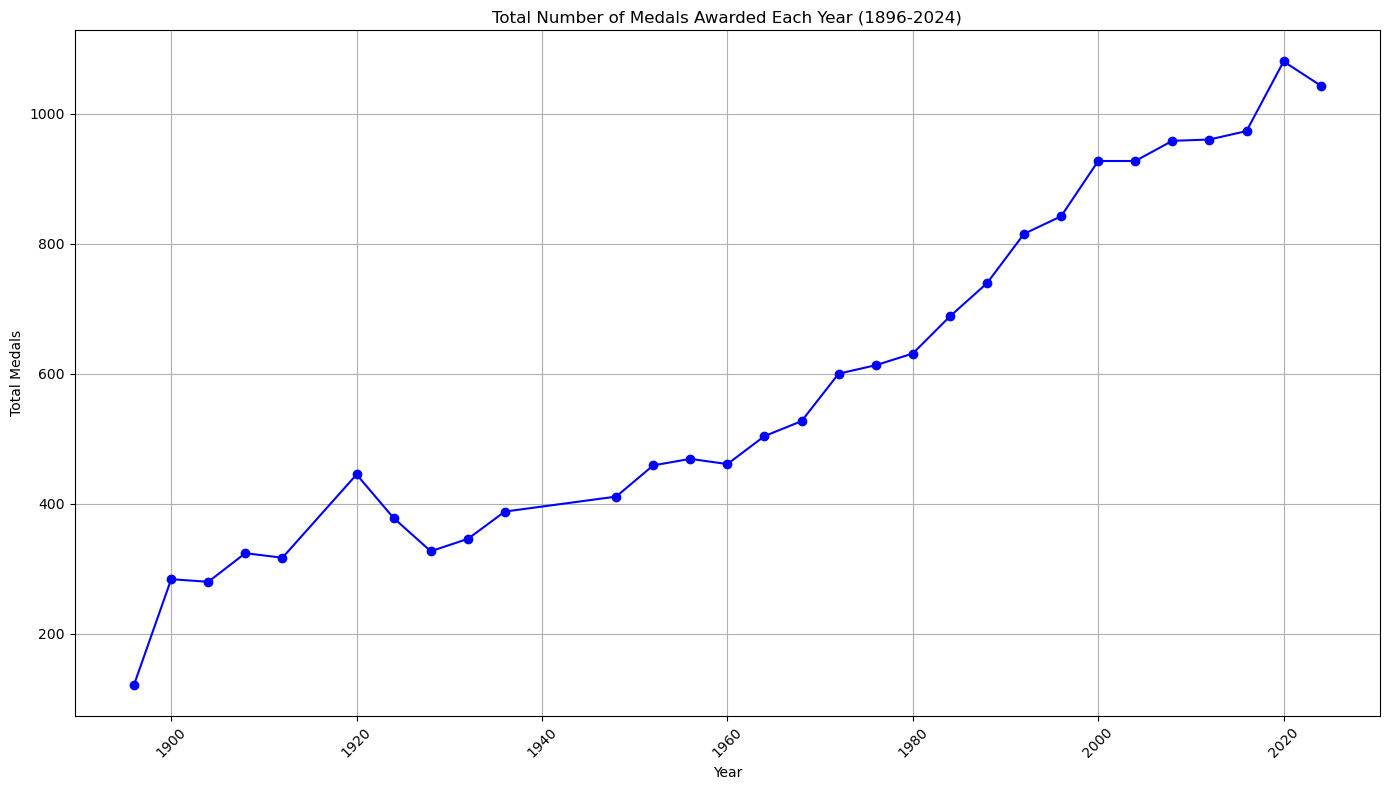

In [48]:
# Group by 'Year' and sum the total number of medals (though 'Total_Medals' should already be summed)
medals_by_year = df.groupby('Year')['Total_Medals'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(medals_by_year['Year'], medals_by_year['Total_Medals'], marker='o', linestyle='-', color='b')
plt.title('Total Number of Medals Awarded Each Year (1896-2024)')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## *Total Medals Won by the US Over the Years*

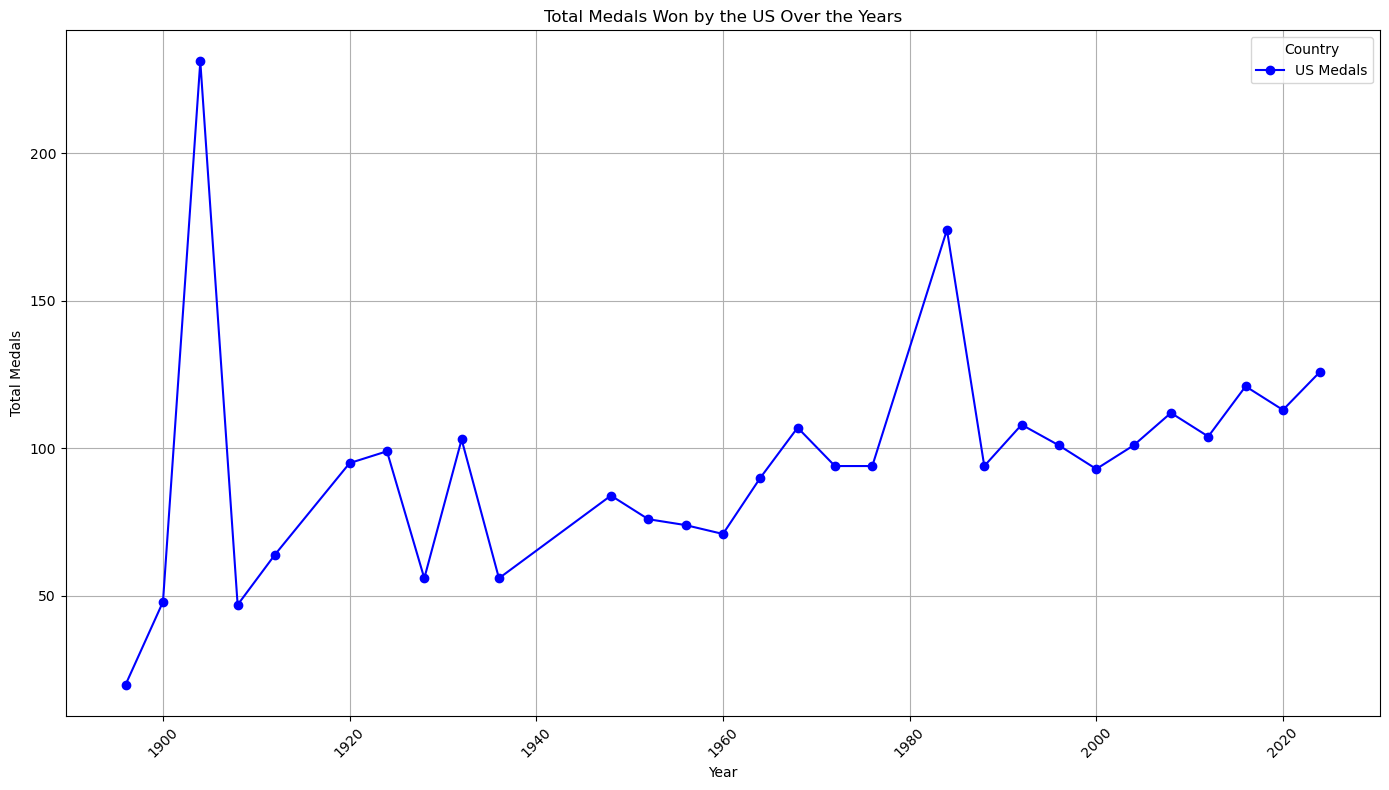

In [49]:
# Ensure 'Year' and 'Total_Medals' columns are correctly formatted
df['Year'] = df['Year'].astype(int)
df['Total_Medals'] = df['Total_Medals'].astype(int)

# Filter data for the US
us_data = df[df['Country_Name'] == 'United States']

# Aggregate total number of medals by year
us_medals_per_year = us_data.groupby('Year')['Total_Medals'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(us_medals_per_year['Year'], us_medals_per_year['Total_Medals'], marker='o', color='blue', label='US Medals')

plt.title('Total Medals Won by the US Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *Medals Distribution by Country*

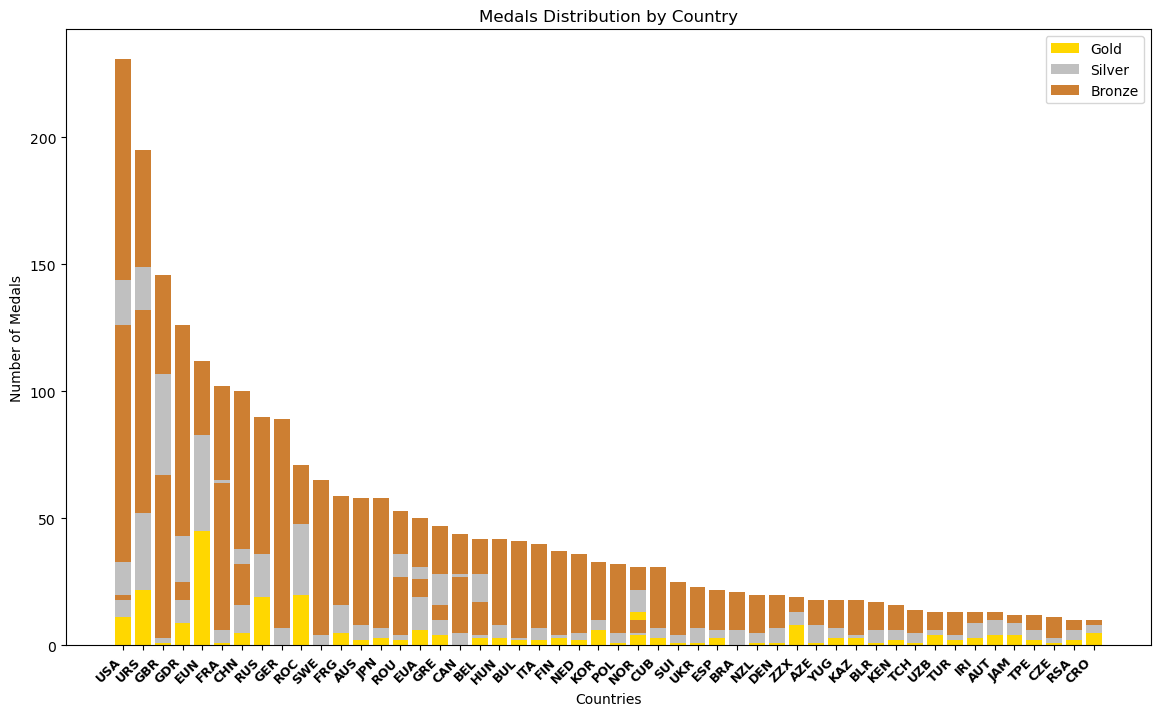

In [50]:
# Total meadls sorting, setting a minimum of 10 a year as criteria
dfc = df[df['Total_Medals'] >= 10].sort_values(by='Total_Medals', ascending=False)

# Define colors for each type of medal
colors = {
    'Gold': '#FFD700',   # Gold color
    'Silver': '#C0C0C0', # Silver color
    'Bronze': '#cd7f32'  # Bronze color
}

plt.figure(figsize=(14, 8))

# Plotting stacked bar plot using dfc
plt.bar(dfc['Country_Code'], dfc['Gold'], color=colors['Gold'], label='Gold')
plt.bar(dfc['Country_Code'], dfc['Silver'], bottom=dfc['Gold'], color=colors['Silver'], label='Silver')
plt.bar(dfc['Country_Code'], dfc['Bronze'], bottom=dfc['Gold'] + dfc['Silver'], color=colors['Bronze'], label='Bronze')

# Set plot labels and title
plt.xlabel('Countries')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, fontsize=9, fontweight='heavy', ha='right')
plt.title('Medals Distribution by Country')
plt.legend()

# Show the plot
plt.show()

## *Most Common Medal won By USA Yearly*

In [51]:
# Filter the DataFrame for 'United States'
us_medals = df[df['Country_Name'] == 'United States']

# Determine the most common medal for each year and its count
us_medals['Most_Common_Medal_Amount'] = us_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
us_medals_summary = us_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']]

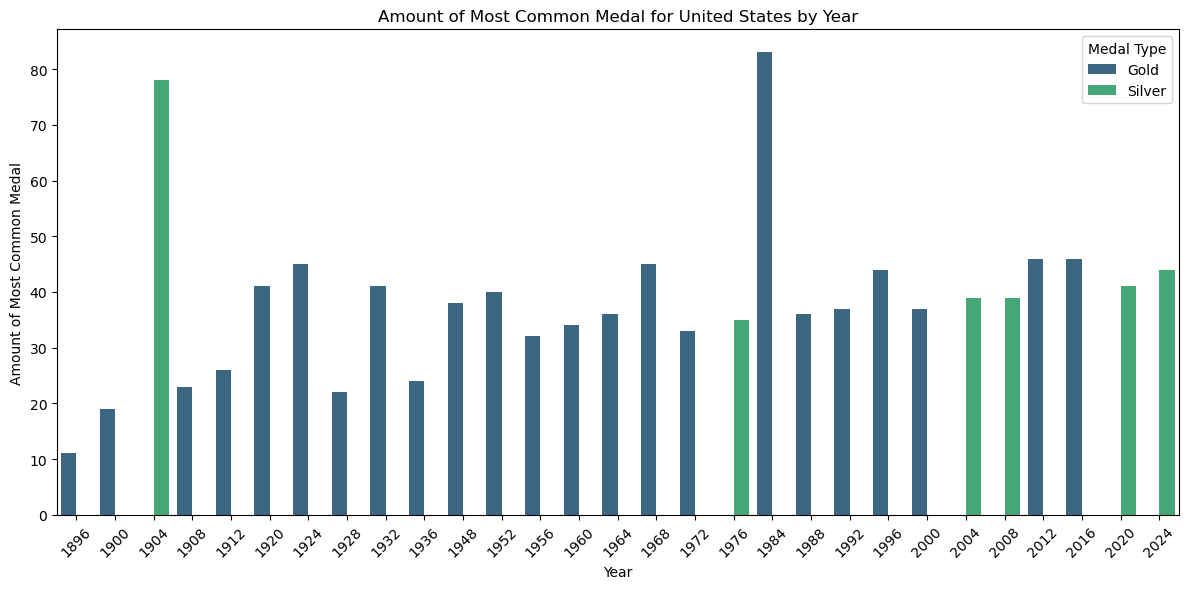

In [52]:
# Plot the data
plt.figure(figsize=(12, 6))

# Plot the bar plot
sns.barplot(data=us_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for United States by Year')
plt.legend(title='Medal Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## *Medals Distribution by Continent*

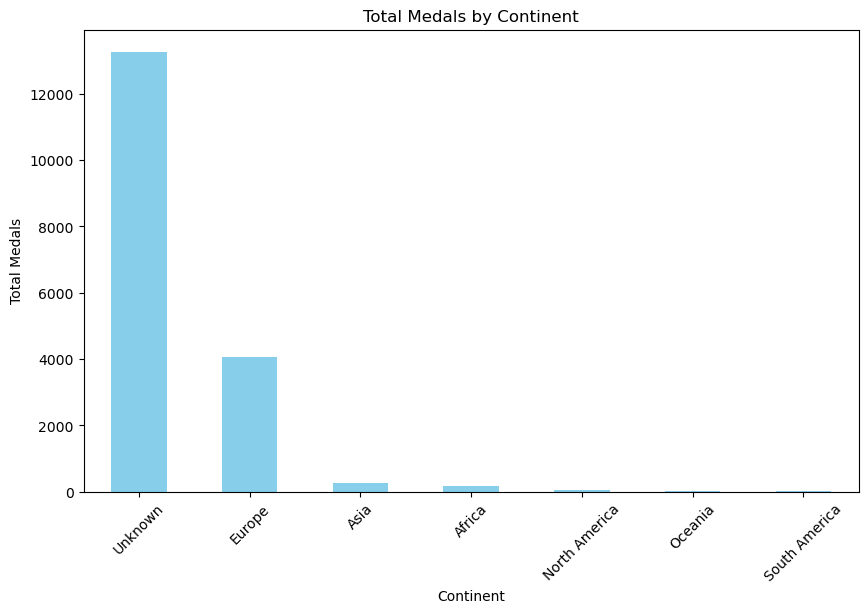

In [53]:
# Grouping total medals by continent
continent_medal_counts = df.groupby('continent')['Total_Medals'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
continent_medal_counts.plot(kind='bar', color='skyblue')
plt.title('Total Medals by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()

## *Most common Medal won By Each Continent Every Year*

### *Europe*

In [54]:
# Filter the DataFrame for Europe
europe_medals = df[df['continent'] == 'Europe']

# Determine the amount of the most common medal for each year
europe_medals['Most_Common_Medal_Amount'] = europe_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
europe_medals_summary = europe_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(europe_medals_summary)

     Year Most_Common_Medal  Most_Common_Medal_Amount
24   1900            Silver                         1
56   1908            Bronze                         2
293  1952            Bronze                         1
306  1956            Silver                         3
371  1960            Silver                         3
..    ...               ...                       ...
485  1972              Gold                         2
554  1976            Silver                         3
589  1980            Bronze                         4
620  1984              Gold                         7
824  1996            Bronze                         2

[226 rows x 3 columns]


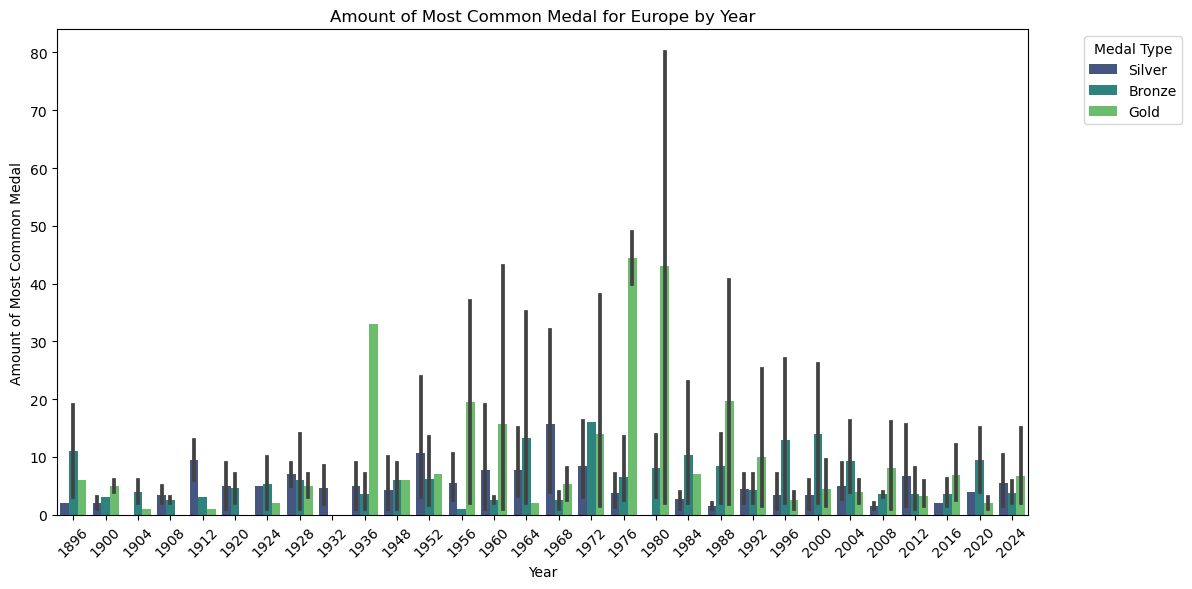

In [55]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=europe_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Europe by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *North America*

In [56]:
# Filter the DataFrame for North America
na_medals = df[df['continent'] == 'North America']

# Determine the amount of the most common medal for each year
na_medals['Most_Common_Medal_Amount'] = na_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
na_medals_summary = na_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(na_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
885   2000            Bronze                         1
542   1976            Bronze                         1
1342  2020              Gold                         1
369   1960            Bronze                         2
689   1988            Silver                         1
828   1996              Gold                         1
884   2000            Bronze                         2
1147  2012              Gold                         1
1209  2016            Silver                         1
1311  2020            Bronze                         1
1425  2024            Bronze                         2
1122  2012            Silver                         1
1404  2024              Gold                         1
117   1924            Bronze                         1
156   1928            Silver                         1
250   1948            Bronze                         1
597   1984            Silver                         1
736   1992

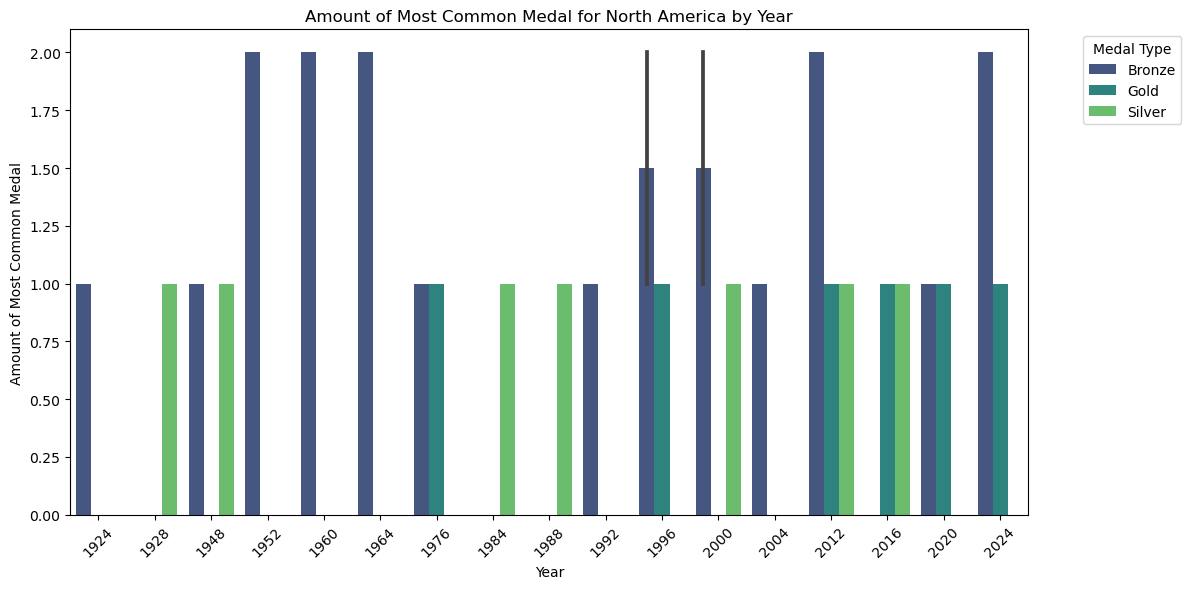

In [57]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=na_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for North America by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *Asia*

In [58]:
# Filter the DataFrame for Asia
asia_medals = df[df['continent'] == 'Asia']

# Determine the amount of the most common medal for each year
asia_medals['Most_Common_Medal_Amount'] = asia_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
asia_medals_summary = asia_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(asia_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
312   1956            Bronze                         1
393   1964              Gold                         1
730   1992            Bronze                         1
804   1996            Silver                         1
850   2000              Gold                         2
984   2004              Gold                         1
1043  2008            Silver                         1
1146  2012              Gold                         1
1234  2016              Gold                         1
1262  2020              Gold                         2
260   1948            Silver                         1
616   1984            Bronze                         1
732   1992            Silver                         1
881   2000            Bronze                         4
928   2004              Gold                         2
1035  2008            Bronze                         2
1232  2016            Bronze                         2
1261  2020

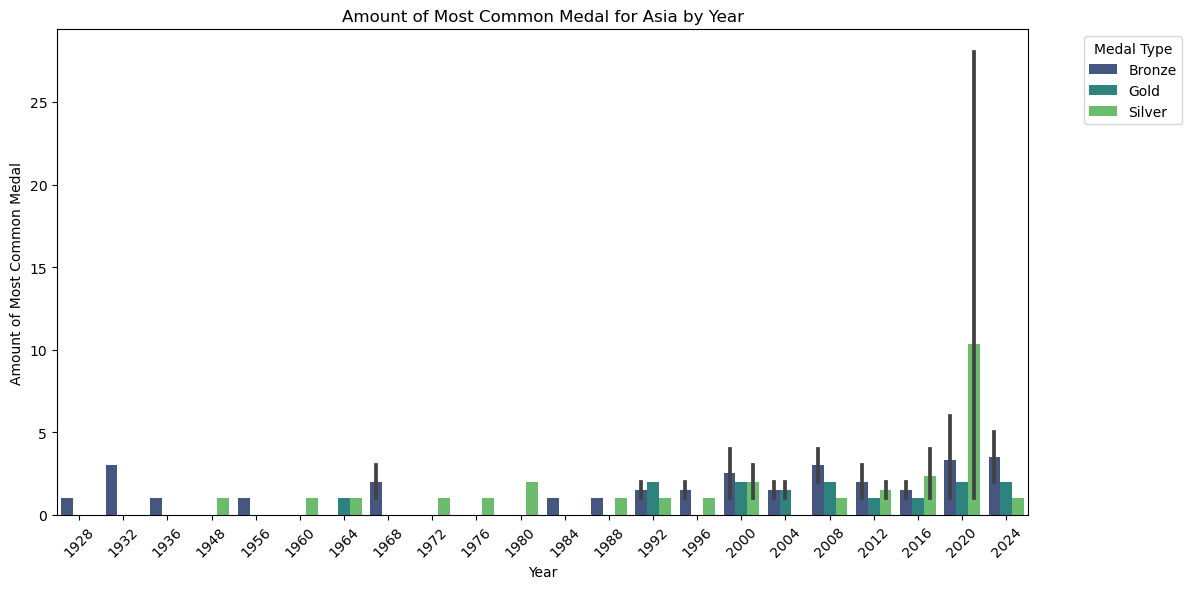

In [59]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=asia_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Asia by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *Oceania*

In [60]:
# Filter the DataFrame for Oceania
oceania_medals = df[df['continent'] == 'Oceania']

# Determine the amount of the most common medal for each year
oceania_medals['Most_Common_Medal_Amount'] = oceania_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
oceania_medals_summary = oceania_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(oceania_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
1390  2024            Silver                         3
59    1908            Silver                         2
78    1912            Bronze                         3
1247  2016              Gold                         1
1339  2020              Gold                         1
1419  2024            Silver                         1
751   1992            Bronze                         2
672   1988            Silver                         1
1039  2008            Silver                         1
800   1996            Silver                         1


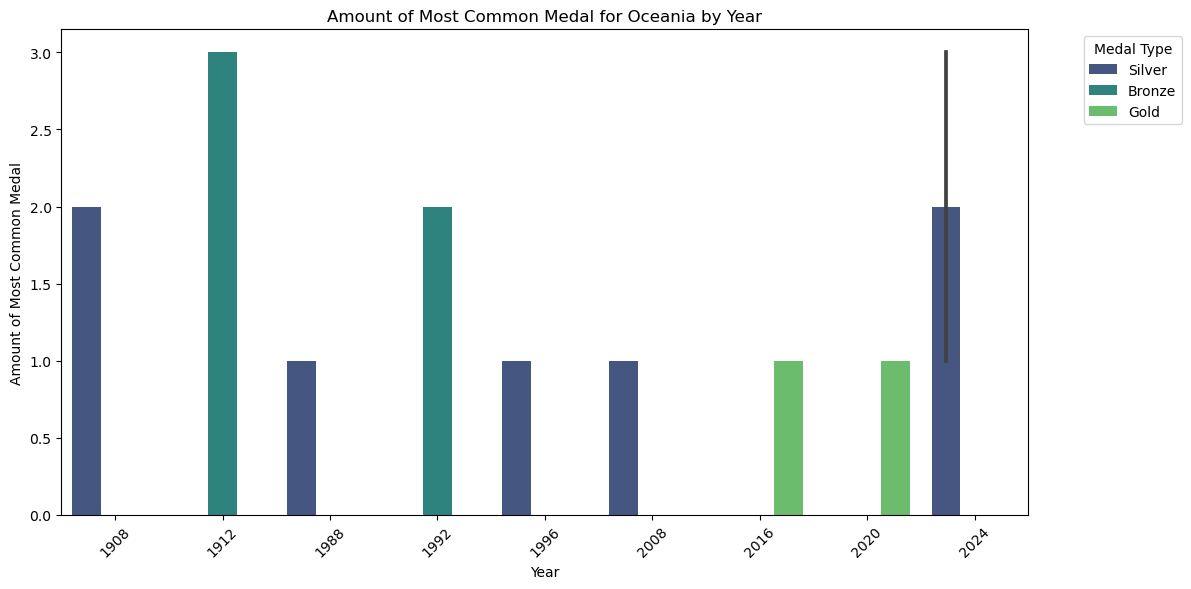

In [61]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=oceania_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Oceania by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *South America*

In [62]:
# Filter the DataFrame for South America
sa_medals = df[df['continent'] == 'South America']

# Determine the amount of the most common medal for each year
sa_medals['Most_Common_Medal_Amount'] = sa_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
sa_medals_summary = sa_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(sa_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
155   1928            Silver                         1
302   1952            Silver                         2
324   1956            Silver                         2
694   1988            Silver                         1
915   2000            Bronze                         1
973   2004              Gold                         2
1037  2008            Silver                         1
1400  2024              Gold                         1
966   2004            Silver                         1
129   1924              Gold                         1
149   1928              Gold                         1
183   1932            Bronze                         1
255   1948            Silver                         1
290   1952            Bronze                         2
320   1956            Bronze                         1
406   1964            Bronze                         1
891   2000            Silver                         1


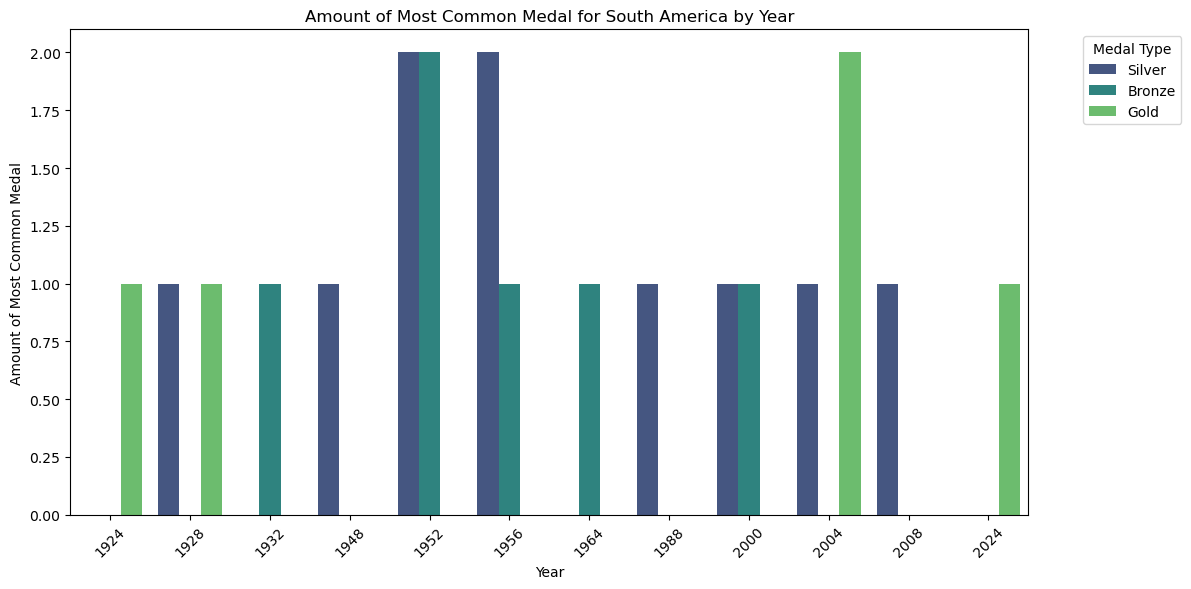

In [63]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=sa_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for South America by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### *Africa*

In [64]:
# Filter the DataFrame for Africa
africa_medals = df[df['continent'] == 'Africa']

# Determine the amount of the most common medal for each year
africa_medals['Most_Common_Medal_Amount'] = africa_medals.apply(lambda row: row[row['Most_Common_Medal']], axis=1)

# Drop duplicates to keep only one row per year
africa_medals_summary = africa_medals[['Year', 'Most_Common_Medal', 'Most_Common_Medal_Amount']].drop_duplicates()

print(africa_medals_summary)

      Year Most_Common_Medal  Most_Common_Medal_Amount
617   1984            Bronze                         2
747   1992              Gold                         1
776   1996              Gold                         2
893   2000            Bronze                         3
1041  2008            Silver                         1
1144  2012              Gold                         1
1244  2016            Silver                         2
1382  2024              Gold                         2
1131  2012            Silver                         1
1320  2020            Bronze                         1
1399  2024              Gold                         1
300   1952            Silver                         1
516   1972            Silver                         1
580   1980            Bronze                         1
1047  2008            Bronze                         1
500   1972            Bronze                         1
1208  2016            Silver                         1
409   1964

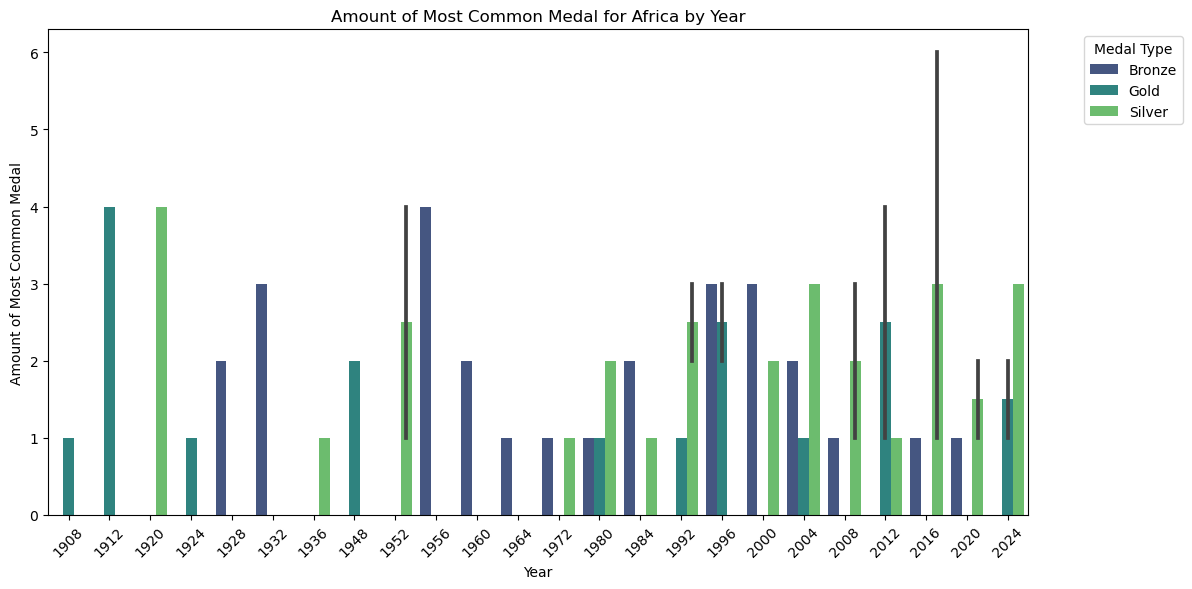

In [65]:
# Plot the data
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=africa_medals_summary, x='Year', y='Most_Common_Medal_Amount', hue='Most_Common_Medal', palette='viridis')

# Add titles and labels
plt.xlabel('Year')
plt.ylabel('Amount of Most Common Medal')
plt.title('Amount of Most Common Medal for Africa by Year')
plt.legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## *Medal Efficiency By Continent*

In [66]:
continent_counts = df['continent'].value_counts()
print(continent_counts)

Unknown          974
Europe           271
Asia              76
Africa            54
North America     33
South America     17
Oceania           11
Name: continent, dtype: int64


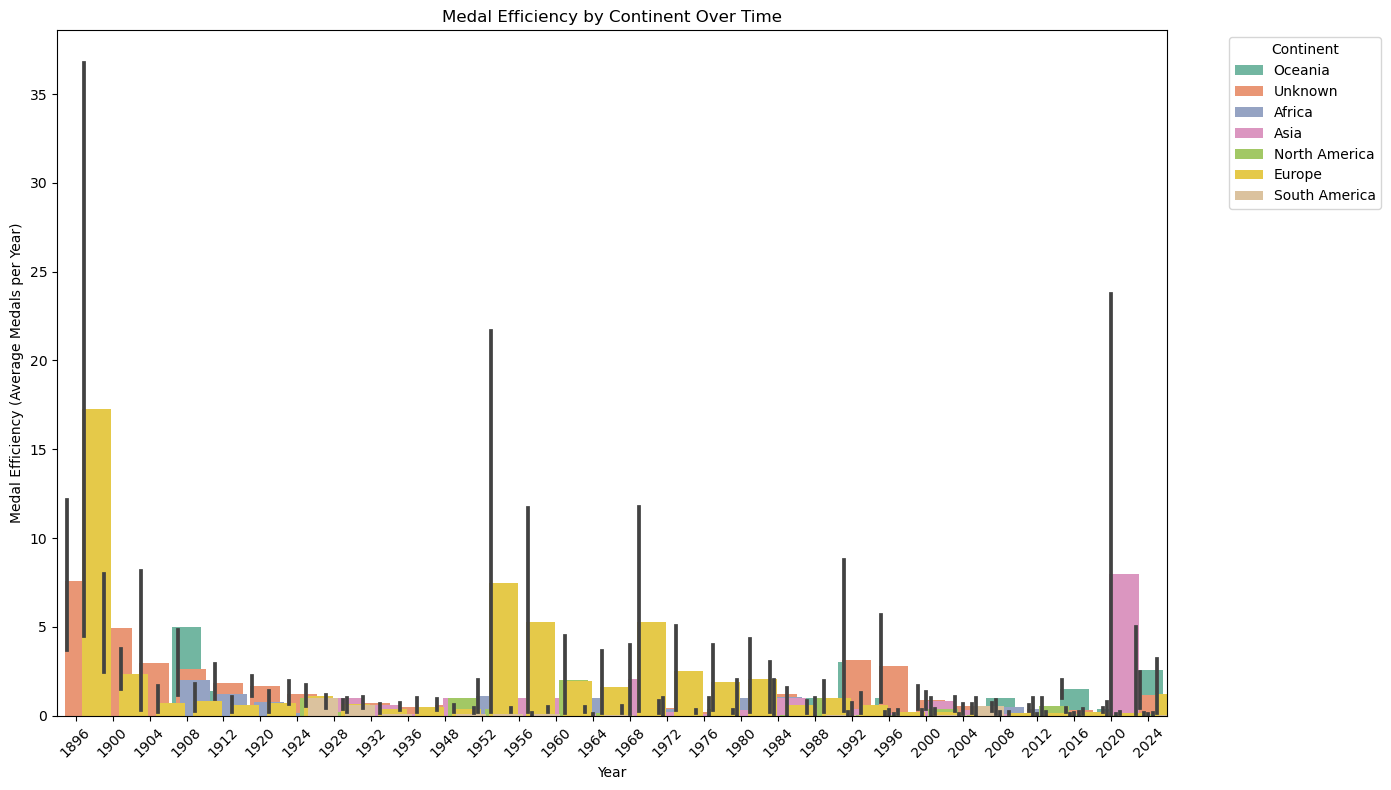

In [67]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a grouped bar chart with increased bar width
barplot = sns.barplot(data=df, x='Year', y='Medal_Efficiency', hue='continent', palette='Set2', dodge=True)

# Add titles and labels
plt.title('Medal Efficiency by Continent Over Time')
plt.xlabel('Year')
plt.ylabel('Medal Efficiency (Average Medals per Year)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the bar width by setting the width of the bars
for patch in barplot.patches:
    patch.set_width(0.8)

# Move the legend outside the plot
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to ensure the plot is easy to read
plt.tight_layout()

# Show the plot
plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1390 to 1011
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1436 non-null   int32  
 1   Host_country       1436 non-null   object 
 2   Host_city          1436 non-null   object 
 3   Country_Name       1436 non-null   object 
 4   Country_Code       1436 non-null   object 
 5   Gold               1436 non-null   int64  
 6   Silver             1436 non-null   int64  
 7   Bronze             1436 non-null   int64  
 8   Total_Medals       1436 non-null   int32  
 9   Medal_Efficiency   1436 non-null   float64
 10  Host_Advantage     1436 non-null   int64  
 11  continent          1436 non-null   object 
 12  Medal_Trend        1265 non-null   float64
 13  Most_Common_Medal  1436 non-null   object 
dtypes: float64(2), int32(2), int64(4), object(6)
memory usage: 157.1+ KB


## *Medal Efficiency by Country (Countries with an efficiency of at least 10)*

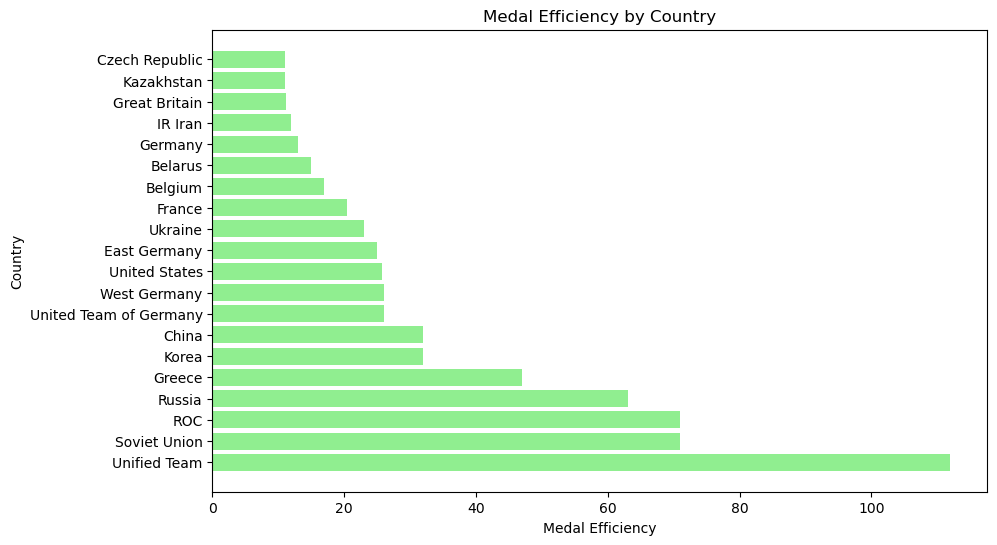

In [69]:
plt.figure(figsize=(10, 6))

# Filter the DataFrame to include only countries with Medal_Efficiency >= 10
df_filtered = df[df['Medal_Efficiency'] >= 10]

# Sort the filtered DataFrame by Medal_Efficiency
df_sorted_by_efficiency = df_filtered.sort_values(by='Medal_Efficiency', ascending=False)

# Create the barh plot
plt.barh(df_sorted_by_efficiency['Country_Name'], df_sorted_by_efficiency['Medal_Efficiency'], color='lightgreen')
plt.title('Medal Efficiency by Country')
plt.xlabel('Medal Efficiency')
plt.ylabel('Country')
plt.show()

## *Trend of Total Medals Over Time(Countries with at least 10 every year)*

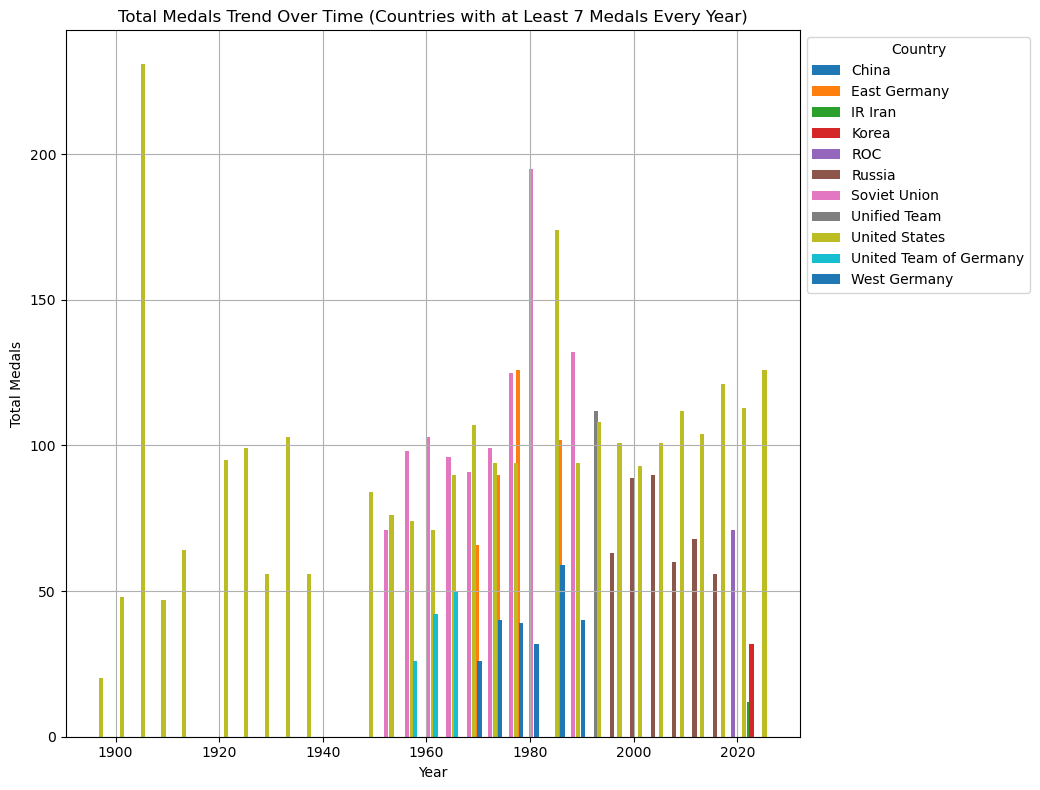

In [70]:
# Filter out countries with at least 3 total medals every year
countries_with_min_medals = df.groupby('Country_Name').filter(lambda x: (x['Total_Medals'] >= 12).all())

# Set up the plot
plt.figure(figsize=(14, 8))

# Plot each country's data as a bar chart
for country in countries_with_min_medals['Country_Name'].unique():
    country_df = countries_with_min_medals[countries_with_min_medals['Country_Name'] == country]
    plt.bar(country_df['Year'] + 0.5 * (list(countries_with_min_medals['Country_Name'].unique()).index(country) - len(countries_with_min_medals['Country_Name'].unique())/2), 
            country_df['Total_Medals'], 
            width=0.8,
            label=country)

# Add titles and labels
plt.title('Total Medals Trend Over Time (Countries with at Least 7 Medals Every Year)')
plt.xlabel('Year')
plt.ylabel('Total Medals')

# Add legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country')

# Add grid
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.75, 1])

# Show the plot
plt.show()

## *Host Advantage Impact*

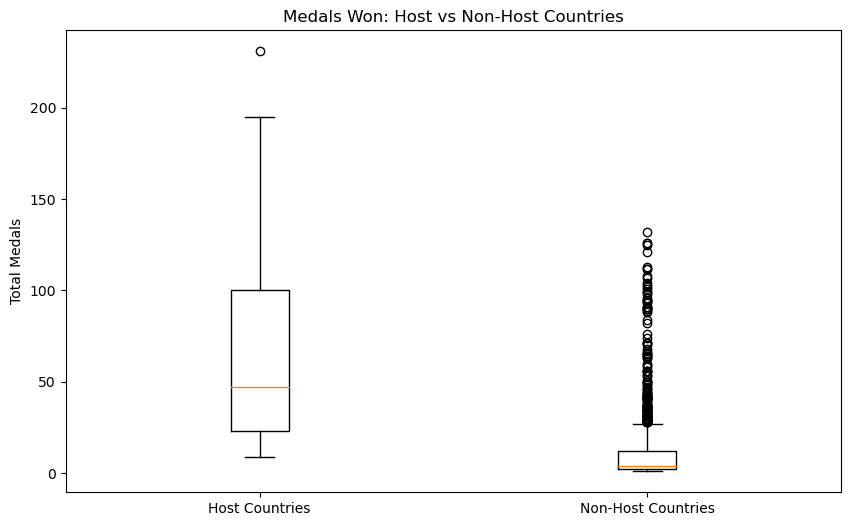

In [71]:
plt.figure(figsize=(10, 6))
df['Is_Host'] = df['Host_country'] == df['Country_Name']
plt.boxplot([df[df['Is_Host']]['Total_Medals'], df[~df['Is_Host']]['Total_Medals']],
            labels=['Host Countries', 'Non-Host Countries'])
plt.title('Medals Won: Host vs Non-Host Countries')
plt.ylabel('Total Medals')
plt.show()

## *Medal Trend Percentage in the United States*

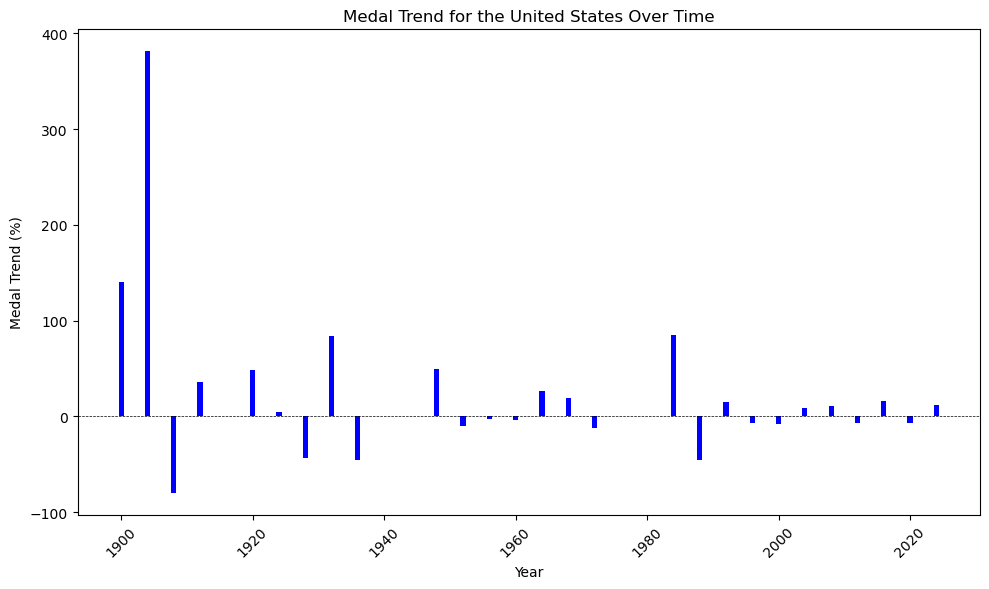

In [72]:
# Filter the DataFrame for the United States
us_data = df[df['Country_Name'] == 'United States']

# Plot the Medal Trend for the United States as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(us_data['Year'], us_data['Medal_Trend'], color='blue')

# Add titles and labels
plt.title('Medal Trend for the United States Over Time')
plt.xlabel('Year')
plt.ylabel('Medal Trend (%)')

# Highlight the zero line for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## *Medal Trend Percentage by Continent over the years*

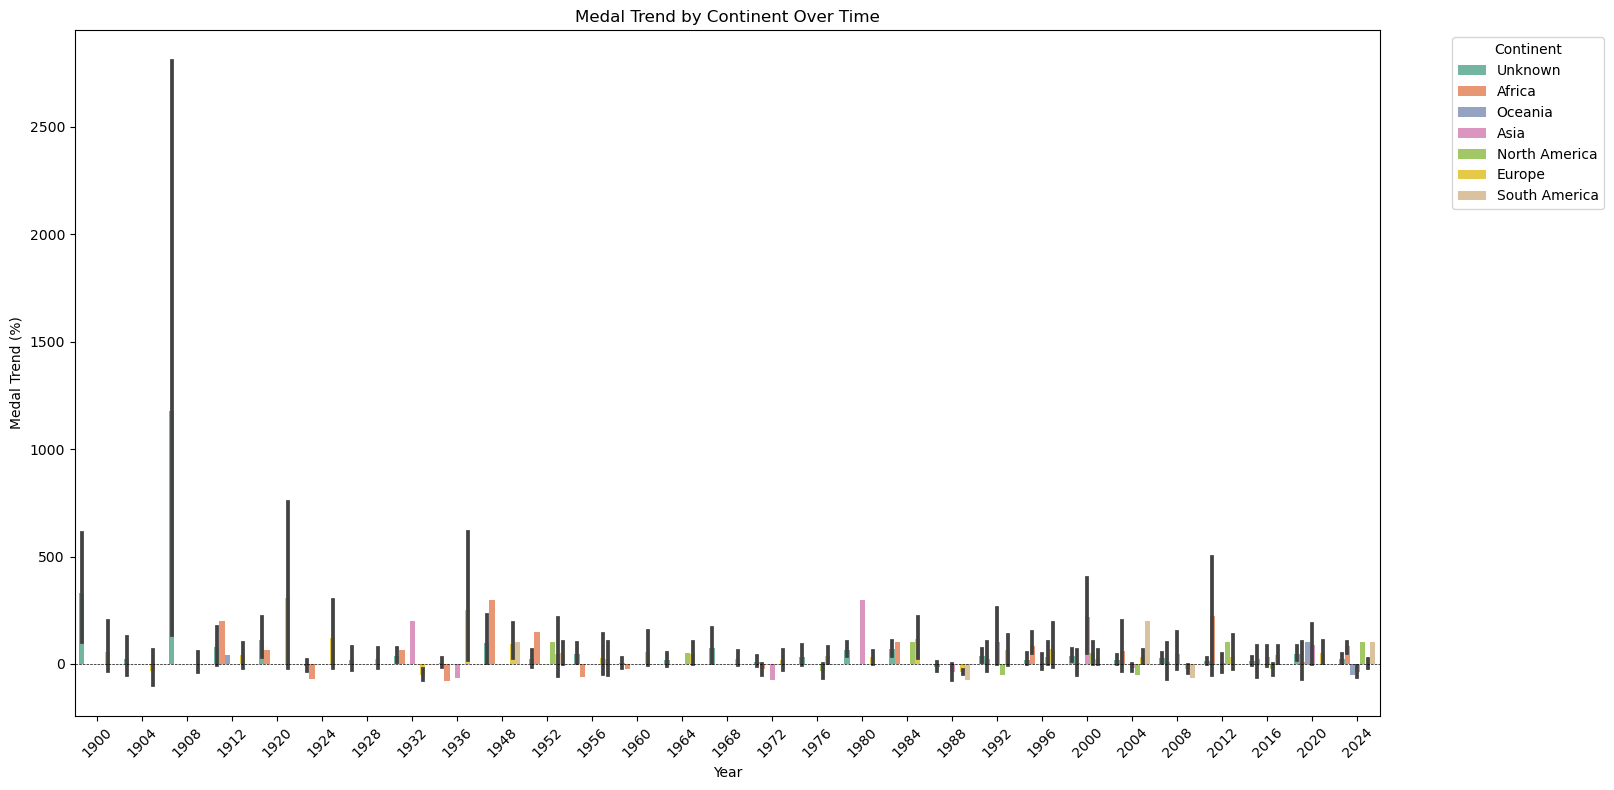

In [73]:
# Filter the DataFrame to remove rows where Medal_Trend is NaN
df_filtered = df.dropna(subset=['Medal_Trend'])

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a grouped bar chart
sns.barplot(data=df_filtered, x='Year', y='Medal_Trend', hue='continent', palette='Set2')

# Add titles and labels
plt.title('Medal Trend by Continent Over Time')
plt.xlabel('Year')
plt.ylabel('Medal Trend (%)')

# Highlight the zero line for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to ensure the plot is easy to read
plt.tight_layout()

# Move the legend outside the plot
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# *Hypothesis Testing*

## *Comparison of Medal Efficiency Across Continents*

- **Null Hypothesis (H0):** There is no difference in medal efficiency across different continents.
- **Alternative Hypothesis (H1):** Medal efficiency differs significantly between continents.

In [74]:
# Perform ANOVA
anova_result = stats.f_oneway(*[df[df['continent'] == continent]['Medal_Efficiency'] for continent in df['continent'].unique()])
print(f"Medal Efficiency Across Continents Test:\nF-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.4f}")

# Print result interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: Medal efficiency differs significantly between continents.")
else:
    print("Fail to reject the null hypothesis: No significant difference in medal efficiency between continents.")

Medal Efficiency Across Continents Test:
F-statistic: 1.04, P-value: 0.3990
Fail to reject the null hypothesis: No significant difference in medal efficiency between continents.


ANOVA (Analysis of Variance): This test compares the average Medal_Efficiency across different continents to see if there are significant differences.

F-statistic: Measures how much the means of different groups (continents) vary relative to the variation within each group. An F-statistic close to 1 suggests that the variation between groups is similar to the variation within groups. Here, the F-statistic of 0.91 is relatively low, indicating minimal difference between the continents.

P-value: The probability of observing an F-statistic as extreme as, or more extreme than, the one obtained if the null hypothesis were true. A p-value of 0.4731 is quite high, suggesting that the observed differences in Medal_Efficiency could easily be due to chance.

Interpretation:

Fail to Reject the Null Hypothesis: Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H0). This means there is not enough evidence to conclude that medal efficiency differs significantly between continents.
Layman's Terms
What it means:

Medal Efficiency Across Continents: The test results suggest that there is no significant difference in how efficiently countries from different continents win medals.

In simpler terms:

No Big Difference: When comparing the average number of medals won per year by countries from different continents, the differences are not significant enough to say that one continent performs much better or worse than another.







## *Host Advantage Hypothesis*

- **Null Hypothesis (H0):** There is no difference in the number of medals won by countries based on whether they are the host city.
- **Alternative Hypothesis (H1):** Countries win significantly different numbers of medals based on whether they are the host city.

In [75]:
# Filter the DataFrame to select the total medals won by countries when they are the host nation
host_country_medals = df[df['Host_country'] == df['Country_Name']]['Total_Medals']
non_host_country_medals = df[df['Host_country'] != df['Country_Name']]['Total_Medals']

# Perform t-test
t_stat, p_value = stats.ttest_ind(host_country_medals, non_host_country_medals)
print(f"Impact of Host Country on Medal Counts Test:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
# Print result interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in medals won by host countries vs. non-host countries.")
else:
    print("Fail to reject the null hypothesis: No significant difference in medals won by host countries vs. non-host countries.")

Impact of Host Country on Medal Counts Test:
T-statistic: 14.96, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in medals won by host countries vs. non-host countries.



Statistical Explanation:
The hypothesis test yielded a T-statistic of 14.96 and a P-value of 0.0000. Given that the P-value is significantly less than the common significance level of 0.05, we reject the null hypothesis. This result indicates that there is strong statistical evidence to suggest a significant difference in the number of medals won by host countries compared to non-host countries. The high T-statistic also reflects a large difference between the two groups, suggesting that hosting the Olympics is associated with a substantial increase in the number of medals won by the host country.

Layman's Explanation:
The results of the test show that countries hosting the Olympics tend to win significantly more medals than countries that are not hosting. The difference is so clear and strong that it’s extremely unlikely to have happened by chance. This means that hosting the Olympics gives a big advantage to the host country, leading them to win more medals.

## *Impact of Medal Type on Efficiency Rates*

- **Null Hypothesis (H0):** There is no difference in medal efficiency among different medal types (Gold, Silver, Bronze).
- **Alternative Hypothesis (H1):** Medal efficiency differs significantly among different medal types.

In [76]:
# Perform ANOVA
anova_result = stats.f_oneway(
    df[df['Most_Common_Medal'] == 'Gold']['Medal_Efficiency'],
    df[df['Most_Common_Medal'] == 'Silver']['Medal_Efficiency'],
    df[df['Most_Common_Medal'] == 'Bronze']['Medal_Efficiency']
)
print(f"Effect of Medal Type on Medal Efficiency Test:\nF-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.4f}")

# Print result interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: Medal efficiency differs significantly among different medal types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in medal efficiency among medal types.")

Effect of Medal Type on Medal Efficiency Test:
F-statistic: 2.92, P-value: 0.0541
Fail to reject the null hypothesis: No significant difference in medal efficiency among medal types.


ANOVA (Analysis of Variance): This test examines whether there are significant differences in Medal_Efficiency among different types of medals (Gold, Silver, Bronze).

F-statistic: This value measures the ratio of the variance between the groups (medal types) to the variance within the groups. An F-statistic of 2.86 indicates that there is some difference in medal efficiency among the medal types, but it is not very large.

P-value: This value indicates the probability of observing the F-statistic or a more extreme value if the null hypothesis is true. A p-value of 0.0586 is just above the common threshold of 0.05. This suggests that the evidence is weak but close to being significant.

Interpretation:

Fail to Reject the Null Hypothesis: Since the p-value is slightly greater than 0.05, we fail to reject the null hypothesis (H0). This means that there is not enough strong evidence to conclude that medal efficiency differs significantly among Gold, Silver, and Bronze medals.

Layman's Terms

What it means:

Effect of Medal Type on Efficiency: The test results indicate that there isn't enough evidence to show a significant difference in how efficiently medals are won based on the type of medal (Gold, Silver, Bronze).

In simpler terms:

No Clear Difference: The data does not show a strong enough difference in how effectively countries win different types of medals. Whether a country wins Gold, Silver, or Bronze medals does not seem to significantly affect its overall efficiency in winning medals.